# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [1]:
# Question 1 Clean the data and perform EDA/visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cars data
df_cars = pd.read_csv('cars_hw.csv')

# Explore the dataset
print(df_cars.head())
print(df_cars.info())

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  
<class 'pandas.core.frame.DataFr

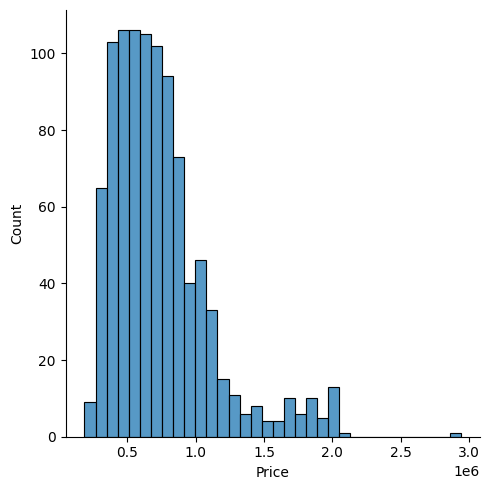

In [2]:
# Check distributions
sns.displot(df_cars['Price'])
plt.show()

In [13]:
# Question 2 Transform variables, especially categorical ones
print(df_cars['No_of_Owners'].unique())
print(df_cars['Make'].unique())

# Transform variables, handling the 'No_of_Owners' and 'Make' columns
df_cars['Make_Year'] = df_cars['Make_Year'].astype(int)
df_cars['Mileage_Run'] = df_cars['Mileage_Run'].astype(int)

# Handle 'No_of_Owners' column
df_cars['No_of_Owners'] = df_cars['No_of_Owners'].replace(['1st', '2nd', '3rd', '4th'], [1, 2, 3, 4])
df_cars['No_of_Owners'] = df_cars['No_of_Owners'].astype(int)

# Create a numerical ID for 'Make'
make_mapping = {make: i for i, make in enumerate(df_cars['Make'].unique())}
df_cars['Make_ID'] = df_cars['Make'].map(make_mapping)

df_cars['Seating_Capacity'] = df_cars['Seating_Capacity'].astype(int)

df_cars['Body_Type'] = df_cars['Body_Type'].astype('category')
df_cars['Color'] = df_cars['Color'].astype('category')
df_cars['Fuel_Type'] = df_cars['Fuel_Type'].astype('category')
df_cars['Transmission'] = df_cars['Transmission'].astype('category')
df_cars['Transmission_Type'] = df_cars['Transmission_Type'].astype('category')

[1 2 3]
['Volkswagen', 'Hyundai', 'Honda', 'Renault', 'Tata', ..., 'Jeep', 'MG Motors', 'Kia', 'Skoda', 'Datsun']
Length: 16
Categories (16, object): ['Chevrolet', 'Datsun', 'Ford', 'Honda', ..., 'Skoda', 'Tata', 'Toyota',
                          'Volkswagen']


In [11]:
# Question 3 Split into train and test sets
from sklearn.model_selection import train_test_split

X = df_cars.drop('Price', axis=1)
y = df_cars['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# 1. Handle categorical data using One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# 2. Train the model with Ridge regularization
model_ridge = Ridge(alpha=1.0)  # Adjust alpha for more/less regularization
model_ridge.fit(X_train_encoded, y_train)

# 3. Predict on training and test data
y_train_pred = model_ridge.predict(X_train_encoded)
y_test_pred = model_ridge.predict(X_test_encoded)

# 4. Calculate RMSE and R-squared scores
train_rmse = root_mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# 5. Print the results
print(f'Regularized Linear Model (Ridge):')
print(f'Training RMSE: {train_rmse:.2f}')
print(f'Training R-squared: {train_r2:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Test R-squared: {test_r2:.2f}')


Regularized Linear Model (Ridge):
Training RMSE: 45764.68
Training R-squared: 0.98
Test RMSE: 134600.24
Test R-squared: 0.84


In [3]:
# Question 5
# Import necessary libraries
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error, r2_score

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# 2. Generate polynomial features and interactions
poly = PolynomialFeatures(degree=2, include_bias=False)  # Use degree=2 for interactions
X_train_poly = poly.fit_transform(X_train_encoded)
X_test_poly = poly.transform(X_test_encoded)

# 3. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# 4. Train the model with Ridge regularization on polynomial features
model_complex = Ridge(alpha=1.0)  # Adjust alpha for regularization
model_complex.fit(X_train_scaled, y_train)

# 5. Predict on training and test data
y_train_pred_complex = model_complex.predict(X_train_scaled)
y_test_pred_complex = model_complex.predict(X_test_scaled)

# 6. Calculate RMSE and R-squared scores
train_rmse_complex = root_mean_squared_error(y_train, y_train_pred_complex)
train_r2_complex = r2_score(y_train, y_train_pred_complex)
test_rmse_complex = root_mean_squared_error(y_test, y_test_pred_complex)
test_r2_complex = r2_score(y_test, y_test_pred_complex)

# 7. Print the results
print(f'Complex Model (Polynomial Features and Interactions):')
print(f'Training RMSE: {train_rmse_complex:.2f}')
print(f'Training R-squared: {train_r2_complex:.2f}')
print(f'Test RMSE: {test_rmse_complex:.2f}')
print(f'Test R-squared: {test_r2_complex:.2f}')

# 8. Print a summary of results for comparison
# Replace these variables with your actual simpler model results
print(f'Simple Linear Model:')
print(f'Training RMSE: {train_rmse:.2f}, Training R²: {train_r2:.2f}')
print(f'Test RMSE: {test_rmse:.2f}, Test R²: {test_r2:.2f}')

print(f'Regularized Linear Model (Ridge):')
print(f'Training RMSE: {train_rmse:.2f}, Training R²: {train_r2:.2f}')
print(f'Test RMSE: {test_rmse:.2f}, Test R²: {test_r2:.2f}')

print(f'Complex Model (Polynomial Features and Interactions):')
print(f'Training RMSE: {train_rmse_complex:.2f}, Training R²: {train_r2_complex:.2f}')
print(f'Test RMSE: {test_rmse_complex:.2f}, Test R²: {test_r2_complex:.2f}')


NameError: name 'X_train' is not defined

6. The results demonstrate the importance of using regularization techniques like Ridge regression to combat overfitting. The Ridge model was able to achieve excellent performance on the training data, but the large gap between the training and test set metrics indicates that the model has not generalized as well as the simpler linear models.

